By AppliedAICourse.com

In [4]:
# Number of CPUs and Threads in Linux.
# Refer: https://linux.die.net/man/1/lscpu
!lscpu

'lscpu' is not recognized as an internal or external command,
operable program or batch file.


In [5]:
# for Mac
!system_profiler SPHardwareDataType; 

'system_profiler' is not recognized as an internal or external command,
operable program or batch file.


## Mean of 100 Million observations

In [6]:
# Generate random 100MM data points 
import numpy as np
n =100000000
d = np.random.rand(n)
print(d.shape)

(100000000,)


In [8]:
import time
def mean(d):
#     Sum using for loops. We can use inbuilt NumPy Sum opeartion for better speed.
    sum = 0
    n = d.size
    for i in range(n):
        sum +=d[i]
    return sum/n

#Time the execution
start_time = time.time()
m = mean(d)
end_time = time.time()

print (end_time-start_time)
print(m)

41.727845191955566
0.5000068503162394


### Multi-Processing Code

In [10]:
#Refer: https://docs.python.org/3/library/multiprocessing.html
from multiprocessing import Process, Queue
import math

def mean_MP(s, e, q ):

  #Sum using for loops. We can use inbuilt NumPy Sum opeartion for better speed.
  sum = 0
  for i in range(s,e+1):
    sum +=d[i]

  #Mean
  mean = sum/(e-s+1)
  q.put(mean)
  return 

n1 = math.floor(n/2)

q = Queue() #Queues are thread and process safe. For communicating between processes and threads.

p1 = Process(target=mean_MP, args=(0, n1,q )) 
p2 = Process(target=mean_MP, args=(n1+1,n-1, q)) 


#Time the execution
start_time = time.time()

p1.start()
p2.start()

p1.join() # Wait till p1 finishes
p2.join() 

m=0;
while not q.empty():
     m += q.get()

m /= 2;
    
end_time = time.time()
print (end_time-start_time)
print(m)


0.1887812614440918
0.0


### Multi-Threaded Code

In [17]:
#Refer: https://docs.python.org/3/library/threading.html
from threading import Thread


means = [0,0];

def mean_MT(s, e, threadNum ):

  #Sum using for loops. We can use inbuilt NumPy Sum opeartion for better speed.
  sum = 0
  for i in range(s,e+1):
    sum +=d[i]

  #Mean
  mean = sum/(e-s+1)
  means[threadNum] = mean; # means is a shared varibale between the threads

  return 

n1 = math.floor(n/2)

t1 = Thread(target=mean_MT, args=(0, n1,0 ))  # Third apram is the thread number
t2 = Thread(target=mean_MT, args=(n1+1,n-1,1)) 

#Time the execution
start_time = time.time()

t1.start()
t2.start()

t1.join() # Wait till t1 finishes
t2.join() 

m = (means[0]+means[1])/2
    
end_time = time.time()
print (end_time-start_time)
print(m)



19.538660049438477
0.4999477716457993


## Joblib


### Caching of function output values

In [19]:

#Transparent and fast disk-caching of output value
# Refer: https://joblib.readthedocs.io/en/latest/
from joblib import Memory
cachedir = './'
mem = Memory(cachedir)

import numpy as np
a = np.vander(np.arange(3)).astype(np.float)
square = mem.cache(np.square)
b = square(a)                                   

________________________________________________________________________________
[Memory] Calling square...
square(array([[0., 0., 1.],
       [1., 1., 1.],
       [4., 2., 1.]]))
___________________________________________________________square - 0.0s, 0.0min


In [20]:
c = square(a)
# The above call did not trigger an evaluation

### Simple Parallel programming for Loops

In [12]:
# Refer: https://joblib.readthedocs.io/en/latest/generated/joblib.Parallel.html
import time
from math import sqrt # inbuilt fucntion

def f(i):
    # some computations  that take time
    x=10000
    p =1;
    for j in range(x):
        for k in range(j):
            p *= k
    return sqrt(i ** 2)
# --------------------------------------
# Find sqrt of first n numbers
n=10
start_time = time.time()
for i in range(n):
    f(i)
end_time = time.time()
print (end_time-start_time)

43.22844648361206


In [18]:
from joblib import Parallel, delayed

start_time = time.time()

a = Parallel(n_jobs=2)(delayed(f)(i) for i in range(n)) 
print(a)
# Why we need dealyed(): https://stackoverflow.com/questions/42220458/what-does-the-delayed-function-do-when-used-with-joblib-in-python

end_time = time.time()
print (end_time-start_time)

[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0]
41.712177991867065


In [19]:
# Multi threading: GIL is an issue
start_time = time.time()

a = Parallel(n_jobs=2,prefer="threads")(delayed(f)(i ** 2) for i in range(n))

end_time = time.time()
print (end_time-start_time)

46.12398409843445


In [20]:

# 6 jobs

from joblib import Parallel, delayed

start_time = time.time()

a = Parallel(n_jobs=6)(delayed(f)(i ** 2) for i in range(n)) 

# Why we need dealyed(): https://stackoverflow.com/questions/42220458/what-does-the-delayed-function-do-when-used-with-joblib-in-python

end_time = time.time()
print (end_time-start_time)

23.46148705482483


In [22]:
import nltk
import networkx as nx
import itertools
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np 
import pandas as pd 

In [30]:
st = PorterStemmer()

text = "The Wandering Earth, described as China’s first big-budget science fiction thriller, quietly made it onto screens at AMC theaters in North America this weekend, and it shows a new side of Chinese filmmaking — one focused toward futuristic spectacles rather than China’s traditionally grand, massive historical epics. At the same time, The Wandering Earth feels like a throwback to a few familiar eras of American filmmaking. While the film’s cast, setting, and tone are all Chinese, longtime science fiction fans are going to see a lot on the screen that reminds them of other movies, for better or worse."
sen = nltk.tokenize.sent_tokenize(text)
output = []
for sentence in sen:
    output.append(" ".join([st.stem(i) for i in sentence.split()]))
for item in output:
    print(item)

the wander earth, describ as china’ first big-budget scienc fiction thriller, quietli made it onto screen at amc theater in north america thi weekend, and it show a new side of chines filmmak — one focus toward futurist spectacl rather than china’ tradit grand, massiv histor epics.
At the same time, the wander earth feel like a throwback to a few familiar era of american filmmaking.
while the film’ cast, setting, and tone are all chinese, longtim scienc fiction fan are go to see a lot on the screen that remind them of other movies, for better or worse.


In [34]:
df = pd.DataFrame(output, columns=['sentences'])
df

,sentences
0,"the wander earth, describ as china’ first big-..."
1,"At the same time, the wander earth feel like a..."
2,"while the film’ cast, setting, and tone are al..."


In [43]:
from sklearn import preprocessing 
# ------------label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder() 
# ------------Assigning numerical values and storing in another column
df['sentences_Cat'] = sorted(label_encoder.fit_transform(df['sentences']))
# df['sentences_Cat'] = label_encoder.fit_transform(df['sentences'])
df

,sentences,sentences_Cat
0,"the wander earth, describ as china’ first big-...",0
1,"At the same time, the wander earth feel like a...",1
2,"while the film’ cast, setting, and tone are al...",2


In [44]:
from sklearn.metrics.pairwise import cosine_similarity

sim_mat = np.zeros([len(df.sentences), len(df.sentences)])
vectorizer = TfidfVectorizer(norm = False, smooth_idf = False)
sentence_vectors = vectorizer.fit_transform(df['sentences'])
for i in range(len(df.sentences)):
    for j in range(len(df.sentences)):
        if i != j:
            sim_mat[i][j] = cosine_similarity(sentence_vectors[i], sentence_vectors[j])[0,0]
print(sim_mat)

[[0.         0.08440483 0.06838615]
 [0.08440483 0.         0.08126475]
 [0.06838615 0.08126475 0.        ]]


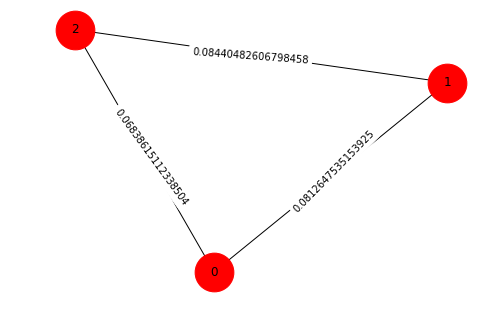

In [111]:
def build_graph(nodes):
    gr = nx.Graph()  # initialize an undirected graph
    gr = nx.from_numpy_matrix(sim_mat, create_using=nx.Graph)
    gr.add_nodes_from(nodes)
    
    nodePairs = list(itertools.combinations(nodes, 2))
    
    # -----------add edges to the graph 
    for pair in nodePairs:
        gr.add_edge(pair[0], pair[1])
        
    #-----------plot(gr, bbox=(500,500),margin=30, vertex_label = sentence)
    nx.draw(gr, width=1, linewidths=1,node_size=1500, labels={node: node for node in gr.nodes()})
    
    labels = nx.get_edge_attributes(gr, "weight")   #Get weights of each edge and assign to labels
    nx.draw_networkx_edge_labels(gr, pos=nx.spring_layout(gr), edge_labels=labels) #-Draw edge labels using layout and list of labels
    
    return gr

graph = build_graph(list(df.sentences_Cat))